In [1]:
from pyspark.sql import SparkSession

In [45]:
import matplotlib.pyplot as plt

In [68]:
import seaborn as sns

In [69]:
import pandas as pd

In [2]:
spark = SparkSession.builder.config("spark.sql.adaptive.enabled", "True").getOrCreate()

In [14]:
fn = 'uber-raw-data-apr14.csv'
apr_df = spark.read.csv(fn, inferSchema=True, header=True, timestampFormat = "yyyy/MM/dd HH:mm:ss")

In [15]:
apr_df.show()

+----------------+-------+--------+------+
|       Date/Time|    Lat|     Lon|  Base|
+----------------+-------+--------+------+
|4/1/2014 0:11:00| 40.769|-73.9549|B02512|
|4/1/2014 0:17:00|40.7267|-74.0345|B02512|
|4/1/2014 0:21:00|40.7316|-73.9873|B02512|
|4/1/2014 0:28:00|40.7588|-73.9776|B02512|
|4/1/2014 0:33:00|40.7594|-73.9722|B02512|
|4/1/2014 0:33:00|40.7383|-74.0403|B02512|
|4/1/2014 0:39:00|40.7223|-73.9887|B02512|
|4/1/2014 0:45:00| 40.762| -73.979|B02512|
|4/1/2014 0:55:00|40.7524| -73.996|B02512|
|4/1/2014 1:01:00|40.7575|-73.9846|B02512|
|4/1/2014 1:19:00|40.7256|-73.9869|B02512|
|4/1/2014 1:48:00|40.7591|-73.9684|B02512|
|4/1/2014 1:49:00|40.7271|-73.9803|B02512|
|4/1/2014 2:11:00|40.6463|-73.7896|B02512|
|4/1/2014 2:25:00|40.7564|-73.9167|B02512|
|4/1/2014 2:31:00|40.7666|-73.9531|B02512|
|4/1/2014 2:43:00| 40.758|-73.9761|B02512|
|4/1/2014 3:22:00|40.7238|-73.9821|B02512|
|4/1/2014 3:35:00|40.7531|-74.0039|B02512|
|4/1/2014 3:35:00|40.7389|-74.0393|B02512|
+----------

In [4]:
lu_df = spark.read.csv('taxi-zone-lookup.csv', inferSchema=True, header=True)

In [9]:
lu_df.count()

265

In [5]:
lu_df.show()

+----------+-------------+--------------------+
|LocationID|      Borough|                Zone|
+----------+-------------+--------------------+
|         1|          EWR|      Newark Airport|
|         2|       Queens|         Jamaica Bay|
|         3|        Bronx|Allerton/Pelham G...|
|         4|    Manhattan|       Alphabet City|
|         5|Staten Island|       Arden Heights|
|         6|Staten Island|Arrochar/Fort Wad...|
|         7|       Queens|             Astoria|
|         8|       Queens|        Astoria Park|
|         9|       Queens|          Auburndale|
|        10|       Queens|        Baisley Park|
|        11|     Brooklyn|          Bath Beach|
|        12|    Manhattan|        Battery Park|
|        13|    Manhattan|   Battery Park City|
|        14|     Brooklyn|           Bay Ridge|
|        15|       Queens|Bay Terrace/Fort ...|
|        16|       Queens|             Bayside|
|        17|     Brooklyn|             Bedford|
|        18|        Bronx|        Bedfor

In [7]:
raw_df = spark.read.csv('uber-raw-data-janjune-15.csv', inferSchema=True, header=True)


In [10]:
raw_df.count()

14270479

In [8]:
raw_df.show(5)

+--------------------+-------------------+-------------------+----------+
|Dispatching_base_num|        Pickup_date|Affiliated_base_num|locationID|
+--------------------+-------------------+-------------------+----------+
|              B02617|2015-05-17 09:47:00|             B02617|       141|
|              B02617|2015-05-17 09:47:00|             B02617|        65|
|              B02617|2015-05-17 09:47:00|             B02617|       100|
|              B02617|2015-05-17 09:47:00|             B02774|        80|
|              B02617|2015-05-17 09:47:00|             B02617|        90|
+--------------------+-------------------+-------------------+----------+
only showing top 5 rows



In [16]:
from pyspark.ml.feature import VectorAssembler

In [27]:
va = VectorAssembler(inputCols=["Lat","Lon"],outputCol="features")

In [28]:
df = va.transform(apr_df)

In [29]:
df.show()

+----------------+-------+--------+------+------------------+
|       Date/Time|    Lat|     Lon|  Base|          features|
+----------------+-------+--------+------+------------------+
|4/1/2014 0:11:00| 40.769|-73.9549|B02512| [40.769,-73.9549]|
|4/1/2014 0:17:00|40.7267|-74.0345|B02512|[40.7267,-74.0345]|
|4/1/2014 0:21:00|40.7316|-73.9873|B02512|[40.7316,-73.9873]|
|4/1/2014 0:28:00|40.7588|-73.9776|B02512|[40.7588,-73.9776]|
|4/1/2014 0:33:00|40.7594|-73.9722|B02512|[40.7594,-73.9722]|
|4/1/2014 0:33:00|40.7383|-74.0403|B02512|[40.7383,-74.0403]|
|4/1/2014 0:39:00|40.7223|-73.9887|B02512|[40.7223,-73.9887]|
|4/1/2014 0:45:00| 40.762| -73.979|B02512|  [40.762,-73.979]|
|4/1/2014 0:55:00|40.7524| -73.996|B02512| [40.7524,-73.996]|
|4/1/2014 1:01:00|40.7575|-73.9846|B02512|[40.7575,-73.9846]|
|4/1/2014 1:19:00|40.7256|-73.9869|B02512|[40.7256,-73.9869]|
|4/1/2014 1:48:00|40.7591|-73.9684|B02512|[40.7591,-73.9684]|
|4/1/2014 1:49:00|40.7271|-73.9803|B02512|[40.7271,-73.9803]|
|4/1/201

In [30]:
from pyspark.ml.clustering import KMeans

In [54]:
km_model = KMeans(k=6).fit(df)

In [55]:
fit_df = km_model.transform(df)

In [56]:
fit_df.show()

+----------------+-------+--------+------+------------------+----------+
|       Date/Time|    Lat|     Lon|  Base|          features|prediction|
+----------------+-------+--------+------+------------------+----------+
|4/1/2014 0:11:00| 40.769|-73.9549|B02512| [40.769,-73.9549]|         0|
|4/1/2014 0:17:00|40.7267|-74.0345|B02512|[40.7267,-74.0345]|         1|
|4/1/2014 0:21:00|40.7316|-73.9873|B02512|[40.7316,-73.9873]|         1|
|4/1/2014 0:28:00|40.7588|-73.9776|B02512|[40.7588,-73.9776]|         0|
|4/1/2014 0:33:00|40.7594|-73.9722|B02512|[40.7594,-73.9722]|         0|
|4/1/2014 0:33:00|40.7383|-74.0403|B02512|[40.7383,-74.0403]|         1|
|4/1/2014 0:39:00|40.7223|-73.9887|B02512|[40.7223,-73.9887]|         1|
|4/1/2014 0:45:00| 40.762| -73.979|B02512|  [40.762,-73.979]|         0|
|4/1/2014 0:55:00|40.7524| -73.996|B02512| [40.7524,-73.996]|         1|
|4/1/2014 1:01:00|40.7575|-73.9846|B02512|[40.7575,-73.9846]|         0|
|4/1/2014 1:19:00|40.7256|-73.9869|B02512|[40.7256,

In [83]:
cent = km_model.clusterCenters()

In [84]:
cent_pd_df = pd.DataFrame(cent,columns=['Lat',"Lon"])

In [85]:
cent_pd_df['Base'] = 'CENTROID'
cent_pd_df['prediction'] = 'CENTROID'

In [86]:
cent_pd_df.to_csv('cent.csv')

In [58]:
fit_df_pd = fit_df.toPandas()

In [80]:
fit_df_pd[['Lat','Lon','Base']]

,Lat,Lon,Base
0,40.7690,-73.9549,B02512
1,40.7267,-74.0345,B02512
2,40.7316,-73.9873,B02512
3,40.7588,-73.9776,B02512
4,40.7594,-73.9722,B02512
...,...,...,...
564511,40.7640,-73.9744,B02764
564512,40.7629,-73.9672,B02764
564513,40.7443,-73.9889,B02764
564514,40.6756,-73.9405,B02764


<AxesSubplot:xlabel='Lat', ylabel='Lon'>

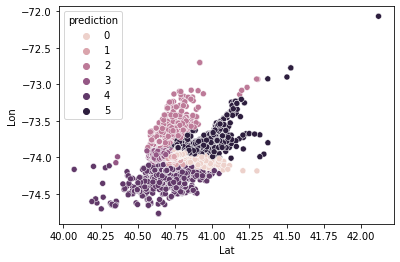

In [60]:
sns.scatterplot(x='Lat', y='Lon', data=fit_df_pd, hue='prediction')

In [82]:
fit_df_pd[['Lat','Lon','Base','prediction']].to_csv('PRED.csv')